# Laser Spectroscopy Lab Notebook

## Group Chat:

Ben, tomorrow, I suggest you first try to replicate what work we did tonight.  Try to see if you can pull 6 peaks as well.  If you can do that, then we need to download the data onto a USB.  I recommend pulling one of the nice TekTronix oscilloscopes from the electronics lab outside the room, and try to get one with a USB.  I think the one on the far right end has what we are looking for.
* Fire up the laser.  Wait at least 20 minutes for the bitch to stabilize its temperature.  Maybe do this first thing when you get in so it can be warming up while you do the Error Analysis assignment with Jun.
* While you are waiting (or once you are done with the assignment), grab the oscilloscope and turn on both it and the function generator.
* Input the settings mentioned below
* Do science

I think we need to get a solid dataset before we start the interferometry.  One of the critical steps is to do what is mentioned in the instructions in all caps.  I think we need to use some cursors to determine what the timescale is on the oscilloscope so we can convert from time to frequency after we do the Michelson-Morely interferometer thingy.  But we need this data first!  You might want to ask Jun for clarification on what the instructions mean, as I am a little confused.

Let me know if you have any issues.  I will have my phone on me most the day.  Good luck!

Turn on laser
Set current to 60.0 mA
Set piezo voltage to 59.5ish V (voltage oscillates)

Turn on function generator
Plug in Oscilloscope to FG
Test triangle function on scope:  We noticed there is a 20db Voltage gain between our inputs and the oscilloscope reading, so we adjusted the inputs on the oscilloscope from 10x to 1x: CH2 -> 1x

**FG Settings:**

Ramp wave

500 mHz

4.0 Vpp

**Laser Settings:**

~~111.8 V~~ Set to 100.0 V, but autoadjusts to 100.8 V

~~60 mA~~ 60.0 mA

Note:  Higher frequencies can oscillate the piezo enough to generate sound!

Signal splitter from FG output: 1 to Oscilloscope, 1 to Laser Diode

We tried following the method mentioned in the Vortex Users guide: start at piezo voltage 59 V, set input voltage to a max of 4.5 Vpp.  However, we were unable to see any fluorescence at these settings.

Adjusted baseline piezo voltage and set oscillation voltage to 0.  We then scanned the piezo voltage spectrum until we found two "Intensity peaks": One at 109.3 V and the other at 113.8 V. I wonder if these are the ${}^{87}Rb \quad F=1 \rightarrow F'=1,2,3$ and the ${}^{85}Rb \quad F=3 \rightarrow F'=2,3,4$ transitions so close together (and mentioned in the lab manual).

88.8 Turning on
90.5 Peak
91.7 trough
93.2 Peak
94.1 Turning off
96.9 Turning on
98.1 Peak
99.0 Turned off
101.3 Turning on
103.6 Turning off

### 31 Jan:
Vortex Laser head would not fire up.  After $\approx$ 45 minutes, the controller still read that the temperature was unstable.  Replaced with different head and realigned beams.

**Current Settings**

Laser: 
* Piezo Voltage: 90.2 V
* Current: 60.0 mA

Function Generator:
* Ramp
* Frequency: 20 Hz
* Amplitude: 5.5 Vpp
* Offset: 0.0 VDC

Oscilloscope:
* Channel 1: Beam 1
* Channel 2: Beam 2 (blocked for calibration
* EXT Trig: Function Generator
* V Scale: 50.0 mV
* T Scale: 100.0 $\mu s$
* Both Channels: 
    * Coupling: DC
    * BW Limit: ON
    * Probe: 1x
    * Invert: ON
* Trigger Menu:
    * Mode: Edge
    * Source: Ext
    * Slope: RightDownRight
    * Sweep: Auto
    * Coupling: DC
    
<img src='6peaks.jpg'>


Laser voltage 91.9
current 60.0 mA

Triangle Wave
20 Hz
1-3 VPP

Turn on laser key, allow $\approx$ 20 minutes to warm up before turning on beam
Turn on Waveform Generator
Turn on Photodetectors

Adjust settings to those mentioned in previous block.
Invert all plots
Go for AC setting

Use laser voltage to shift plot L/R
Once on 87Rb Peak (smaller one on right) adjust waveform generator frequency and Vpp amplitude voltage until signals become clear.

To generate solid looking plot, go to aquire and set averages

Qs:
Use Trigger Edge, but see about setting differnent direction choices


In [2]:
%matplotlib inline
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import erf,erfc
from scipy.optimize import curve_fit
from scipy import signal

plt.style.use('ggplot')

In [3]:
# data = pd.DataFrame(pd.read_csv('Laser_Spec_Data/NewFile0.csv'))
# #data1 = pd.read_csv('/home/bjorn/Documents/CU/PHYS_4430/Test_Profile_Data.csv', index_col='Position (m)')

# data1 = data[:]
# del data1['Unnamed: 3']
# data1 = data1.drop(0)
# # xa = np.array(float(data1['X']))
# # y1 = np.array(data['CH1'])
# # y2 = np.array(data['CH2'])

# data1=data1.astype('float')
# data1['CH1'] = data1['CH1']*-1
# data1['CH2'] = data1['CH2']*-1
# data1 = data1.rename(columns={'X':'t (s)', 'CH1':'Pumped Probe (V)', 'CH2':'Doppler Shifted Probe (V)'})


# fig = plt.figure()
# ax = plt.subplot(111)
# plt.figure(figsize=(12,15))
# data1.plot(kind = 'scatter',x='t (s)', y='Pumped Probe (V)',style = 'b.', ax = ax, label = 'Pumped Probe (V)')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Doppler Shifted Probe (V)', style = 'b.',  ax = ax, label = 'Doppler Shifted Probe (V)')
# ax.set_xlim(data1['t (s)'].min(), data1['t (s)'].max())
# ax.set(ylabel='Voltage (V)')
# ax.legend(loc='best')
# fig.set_figheight(15)
# fig.set_figwidth(15)
# ax.set_title('Data from lame oscilloscope')

# plt.show()


### 2 Feb:
Collected new data on Tektronix MDO3014:

**Laser Settings**
* 92.8 V
* 60.3 mA

**Function Generator**
* Ramp
* 7 Hz
* 800 mVpp

<img src= tek00000.png>

In [4]:
# data = pd.DataFrame(pd.read_csv('Laser_Spec_Data/tek0014ALLclear.csv'))
# #data1 = pd.read_csv('/home/bjorn/Documents/CU/PHYS_4430/Test_Profile_Data.csv', index_col='Position (m)')

# data1 = data[:]
# # del data1['Unnamed: 3']
# # data1 = data1.drop(0)
# # xa = np.array(float(data1['X']))
# # y1 = np.array(data['CH1'])
# # y2 = np.array(data['CH2'])

# data1=data1.astype('float')
# # data1['CH1'] = data1['CH1']*-1
# # data1['CH2'] = data1['CH2']*-1
# data1 = data1.rename(columns={'TIME':'t (s)', 'CH1':'Pumped Probe (V)', 'CH2':'Doppler Shifted Probe (V)', 'MATH<CH2-CH1>':'Doppler-Free Saturated Absorption Spectral Lines (V)'})


# fig = plt.figure()
# ax = plt.subplot(111)
# plt.figure(figsize=(12,15))
# data1.plot(kind = 'scatter',x='t (s)', y='Pumped Probe (V)',color = 'yellow', ax = ax, label = 'Pumped Probe (V)')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Doppler Shifted Probe (V)', color='blue',  ax = ax, label = 'Doppler Shifted Probe (V)')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Doppler-Free Saturated Absorption Spectral Lines (V)',color = 'red',  ax = ax, label = 'Doppler-Free Saturated Absorption Spectral Lines (V)')
# ax.set_xlim(data1['t (s)'].min(), data1['t (s)'].max())
# ax.set(ylabel='Voltage (V)')
# ax.legend(loc='best')
# fig.set_figheight(15)
# fig.set_figwidth(15)
# ax.set_title('Data from lame oscilloscope')

# plt.show()


Questions:

How much of an overlap betweeen the first probe beam and the pump beam is required?  How close can the pump beam get to the second probe beam?



In [5]:
# data = pd.DataFrame(pd.read_csv('Laser_Spec_Data/tek0014ALLclear.csv'))
# data

**Prodedure**
* Set up table as shown in picture, align beams.
* Turn off lights
* Once ready to take data, block pump beam and manipulate variable attenuator until voltage readings from both channels equalize
* Remove block from pump beam, adjust laser voltage/current until fluorescence observed.
* Turn on function generator and set baseline settings.
* Toggle (some combo of 2: laser voltage/oscilloscope trigger/fn gen freq/fn gen vpp) until desired peak is on scope.
* Toggle (other combo of 2) until desired resolution is achieved.
* Make sure ramp (trigger from fn generator) is on screen
* Collect Data, output to USB
* Observe voltage of ramp where peaks of spectra occur
* Insert Beam diverter into Michelson interferometer to obtain voltage to frequency conversion.
* convert ramp voltage to frequency to determine frequency of observed spectral lines.
* compare to known frequencies for hyperfine transitions.



In [6]:
print((113.8+109.8)/2)
print(113.9-111.8)
print(111.8-109.8)

111.8
2.1000000000000085
2.0


#### Change Log

31 Jan:  Had to swap out Laser head.  After $\approx$ 45 minutes, head was still not temperature stable.  Adjusted laser settings accordingly.

#### Helpful Links
Rigol Function Generator http://pmaweb.caltech.edu/~phy003/DG1022_UserGuide_EN.pdf

Rigol Oscilloscope https://cdn-shop.adafruit.com/datasheets/Users+Guide+DS1000E.pdf


### 2 February

* I noticed that when I have the voltage ramping up, the datasheet for the laser says the frequency should be increasing.  I will record data this way, since I want increasing frequency going to the right.

**Procedure**
* On Oscope, set trigger to waveform generator. Once trigger is set, it shouldnt have to be reset
* Adjust laser voltage and current until desired peaks are on scope
* Manipulate function generator Vpp concurrently with laser voltage until you achieve desired window of data.  Use the trigger signal to tell where this window is.
* Adjusting frequency seems to spread out the signal without increasing resolution.  Adjust until satisfied.  Use aquire->averages to clean up signal
* Save Data

95.9 V
60.0 mA


In [7]:
# data = pd.DataFrame(pd.read_csv('Laser_Spec_Data/New_Data/87Rb_01_clean.csv'))
# #data1 = pd.read_csv('/home/bjorn/Documents/CU/PHYS_4430/Test_Profile_Data.csv', index_col='Position (m)')

# data1 = data[:]
# # del data1['Unnamed: 3']
# # data1 = data1.drop(0)
# # xa = np.array(float(data1['X']))
# # y1 = np.array(data['CH1'])
# # y2 = np.array(data['CH2'])

# data1=data1.astype('float')
# # data1['CH1'] = data1['CH1']*-1
# # data1['CH2'] = data1['CH2']*-1
# data1 = data1.rename(columns={'TIME':'t (s)', 'CH1':'Pumped Probe (V)', 'CH2':'Doppler Shifted Probe (V)','CH4':'Trigger Signal', 'MATH<CH2-CH1>':'Doppler-Free Saturated Absorption Spectral Lines (V)'})


# fig = plt.figure()
# ax = plt.subplot(111)
# plt.figure(figsize=(12,15))
# data1.plot(kind = 'scatter',x='t (s)', y='Pumped Probe (V)',color = 'yellow', ax = ax, label = 'Pumped Probe (V)')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Doppler Shifted Probe (V)', color='blue',  ax = ax, label = 'Doppler Shifted Probe (V)')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Trigger Signal', color='green',  ax = ax, label = 'Trigger Signal (V)')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Doppler-Free Saturated Absorption Spectral Lines (V)',color = 'red',  ax = ax, label = 'Doppler-Free Saturated Absorption Spectral Lines (V)')
# ax.set_xlim(data1['t (s)'].min(), data1['t (s)'].max())
# ax.set(ylabel='Voltage (V)')
# ax.legend(loc='best')
# fig.set_figheight(15)
# fig.set_figwidth(15)
# ax.set_title('Doppler-Free Saturated Absorption Spectroscopy with ${}^{87}Rb$')

# plt.show()

In [8]:
# data = pd.DataFrame(pd.read_csv('Laser_Spec_Data/New_Data/85Rb_01_clean.csv'))
# #data1 = pd.read_csv('/home/bjorn/Documents/CU/PHYS_4430/Test_Profile_Data.csv', index_col='Position (m)')

# data1 = data[:]
# # del data1['Unnamed: 3']
# # data1 = data1.drop(0)
# # xa = np.array(float(data1['X']))
# # y1 = np.array(data['CH1'])
# # y2 = np.array(data['CH2'])

# data1=data1.astype('float')
# # data1['CH1'] = data1['CH1']*-1
# # data1['CH2'] = data1['CH2']*-1
# data1 = data1.rename(columns={'TIME':'t (s)', 'CH1':'Pumped Probe (V)', 'CH2':'Doppler Shifted Probe (V)','CH4':'Trigger Signal', 'MATH<CH2-CH1>':'Doppler-Free Saturated Absorption Spectral Lines (V)'})


# fig = plt.figure()
# ax = plt.subplot(111)
# plt.figure(figsize=(12,15))
# data1.plot(kind = 'scatter',x='t (s)', y='Pumped Probe (V)',color = 'yellow', ax = ax, label = 'Pumped Probe (V)')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Doppler Shifted Probe (V)', color='blue',  ax = ax, label = 'Doppler Shifted Probe (V)')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Trigger Signal', color='green',  ax = ax, label = 'Trigger Signal (V)')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Doppler-Free Saturated Absorption Spectral Lines (V)',color = 'red',  ax = ax, label = 'Doppler-Free Saturated Absorption Spectral Lines (V)')
# ax.set_xlim(data1['t (s)'].min(), data1['t (s)'].max())
# ax.set(ylabel='Voltage (V)')
# ax.legend(loc='best')
# fig.set_figheight(15)
# fig.set_figwidth(15)
# ax.set_title('Doppler-Free Saturated Absorption Spectroscopy with ${}^{85}Rb$')

# plt.show()

In [9]:
c = 2.998E8
dNu = .5E9
print(c/(2*dNu))

0.2998


### 6 Feb

**Laser**
* 60.0 mA
* 92.4 V

**Fn Generator**
* 180 mVpp
* 32 Hz


Goal: Today, we want to get the Michelson interferometer working.  

We noticed (Thanks Jun) that the interferometer is sending a beam back into the setup.  We need to block the beam into the interferometer when collecting data, or else we will get interference fringes imposed on the data.

**Mirror Distances in Interferometer**
* M1: 
* M2: 

We placed an attenuator between the interferometer array and the spectroscopy array to minimize optical feedback into the laser cavity.

Once we properly adjusted the mirrors so that we obtained the proper interferometry signal, we plugged the signal from the interferometer setup into the main oscilloscope collecting data on the Rubidium spectroscopy experiment.  We can now directly compare the fringe widths from the interferometry with the transition lines from the spectroscopy.

We can directly compare the 

The spectra we are interested in measuring are much closer spaced than the peaks of the interference pattern.  We are going to try to increase $\Delta L$ so we can get more fringes per unit time.

**Procedure**
* Before turning on function generator, measure DC coupled signals from photodetectors.  Adjust attenuator on probe 2 so that its output voltage is of the same intensity.  This should help ensure subtraction of signals is most accurate
* We want at least 3 peaks from the interferometer signal so we can ensure we have a reasonable sampling.  This should also help with error analysis

In [10]:
# data = pd.DataFrame(pd.read_csv('Laser_Spec_Data/6-Feb/85Rb_06FEB18_03.csv',usecols=[0,1,2,3,4,7], skiprows=20))
#data1 = pd.read_csv('/home/bjorn/Documents/CU/PHYS_4430/Test_Profile_Data.csv', index_col='Position (m)')

# data1 = data[:]
# del data1['Unnamed: 3']
# data1 = data1.drop(0)
# xa = np.array(float(data1['X']))
# y1 = np.array(data['CH1'])
# y2 = np.array(data['CH2'])

# data1=data1.astype('float')
# data1['CH1'] = data1['CH1']*-1
# data1['CH2'] = data1['CH2']*-1
# data1 = data1.rename(columns={'TIME':'t (s)', 'CH1':'Pumped Probe (V)', 'CH2':'Doppler Broadened Probe (V)','CH3':'Interferometer Signal','CH4':'Trigger Signal', 'MATH<CH1-CH2>':'Doppler-Free Saturated Absorption Spectral Lines (V)'})


# fig = plt.figure()
# ax = plt.subplot(111)
# plt.figure(figsize=(12,15))
# data1.plot(kind = 'scatter',x='t (s)', y='Pumped Probe (V)',color = 'yellow', ax = ax, label = 'Pumped Probe (V)')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Doppler Broadened Probe (V)', color='blue',  ax = ax, label = 'Doppler Broadened Probe (V)')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Interferometer Signal', color='black',  ax = ax, label = 'Interferometer Signal')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Trigger Signal', color='green',  ax = ax, label = 'Trigger Signal (V)')
# data1.plot(kind = 'scatter', x='t (s)', y = 'Doppler-Free Saturated Absorption Spectral Lines (V)',color = 'red',  ax = ax, label = 'Doppler-Free Saturated Absorption Spectral Lines (V)')
# ax.set_xlim(data1['t (s)'].min(), data1['t (s)'].max())
# ax.set(ylabel='Voltage (V)')
# ax.legend(loc='best')
# fig.set_figheight(15)
# fig.set_figwidth(15)
# ax.set_title('Doppler-Free Saturated Absorption Spectroscopy with ${}^{85}Rb$')

# plt.show()

In [11]:
# Rb85_1 = pd.read_csv('Laser_Spec_Data/6-Feb/85Rb_06FEB18_01.csv',usecols=[0,1,2,3,4,7], skiprows=20, names={'TIME':'t (s)', 'CH1':'Pumped Probe (V)', 'CH2':'Doppler Broadened Probe (V)','CH3':'Interferometer Signal','CH4':'Trigger Signal', 'MATH<CH1-CH2>':'Doppler-Free Saturated Absorption Spectral Lines (V)'})
# Rb85_2 = pd.read_csv('Laser_Spec_Data/6-Feb/85Rb_06FEB18_02.csv',usecols=[0,1,2,3,4,7], skiprows=20, names={'TIME':'t (s)', 'CH1':'Pumped Probe (V)', 'CH2':'Doppler Broadened Probe (V)','CH3':'Interferometer Signal','CH4':'Trigger Signal', 'MATH<CH1-CH2>':'Doppler-Free Saturated Absorption Spectral Lines (V)'})
# Rb85_3 = pd.read_csv('Laser_Spec_Data/6-Feb/85Rb_06FEB18_03.csv',usecols=[0,1,2,3,4,7], skiprows=20, names={'TIME':'t (s)', 'CH1':'Pumped Probe (V)', 'CH2':'Doppler Broadened Probe (V)','CH3':'Interferometer Signal','CH4':'Trigger Signal', 'MATH<CH1-CH2>':'Doppler-Free Saturated Absorption Spectral Lines (V)'})
# Rb85_4 = pd.read_csv('Laser_Spec_Data/6-Feb/85Rb_06FEB18_04.csv',usecols=[0,1,2,3,4,7], skiprows=20, names={'TIME':'t (s)', 'CH1':'Pumped Probe (V)', 'CH2':'Doppler Broadened Probe (V)','CH3':'Interferometer Signal','CH4':'Trigger Signal', 'MATH<CH1-CH2>':'Doppler-Free Saturated Absorption Spectral Lines (V)'})

Rb85_1 = pd.read_csv('Laser_Spec_Data/6-Feb/85Rb_06FEB18_01.csv',usecols=[0,1,2,3,4,7], skiprows=21, names=['t (ms)', 'Pumped Probe (mV)', 'Doppler Broadened Probe (mV)','Interferometer Signal','Trigger Signal', 'Doppler-Free Saturated Absorption Spectral Lines (mV)']).mul(1000)
Rb85_2 = pd.read_csv('Laser_Spec_Data/6-Feb/85Rb_06FEB18_02.csv',usecols=[0,1,2,3,4,7], skiprows=21, names=['t (ms)', 'Pumped Probe (mV)', 'Doppler Broadened Probe (mV)','Interferometer Signal','Trigger Signal', 'Doppler-Free Saturated Absorption Spectral Lines (mV)']).mul(1000)
Rb85_3 = pd.read_csv('Laser_Spec_Data/6-Feb/85Rb_06FEB18_03.csv',usecols=[0,1,2,3,4,7], skiprows=21, names=['t (ms)', 'Pumped Probe (mV)', 'Doppler Broadened Probe (mV)','Interferometer Signal','Trigger Signal', 'Doppler-Free Saturated Absorption Spectral Lines (mV)']).mul(1000)
Rb85_4 = pd.read_csv('Laser_Spec_Data/6-Feb/85Rb_06FEB18_04.csv',usecols=[0,1,2,3,4,7], skiprows=21, names=['t (ms)', 'Pumped Probe (mV)', 'Doppler Broadened Probe (mV)','Interferometer Signal','Trigger Signal', 'Doppler-Free Saturated Absorption Spectral Lines (mV)']).mul(1000)
Rb87_1 = pd.read_csv('Laser_Spec_Data/6-Feb/87Rb_06FEB18_01.csv',usecols=[0,1,2,3,4,7], skiprows=21, names=['t (ms)', 'Pumped Probe (mV)', 'Doppler Broadened Probe (mV)','Interferometer Signal','Trigger Signal', 'Doppler-Free Saturated Absorption Spectral Lines (mV)']).mul(1000)
Rb87_2 = pd.read_csv('Laser_Spec_Data/6-Feb/87Rb_06FEB18_02.csv',usecols=[0,1,2,3,4,7], skiprows=21, names=['t (ms)', 'Pumped Probe (mV)', 'Doppler Broadened Probe (mV)','Interferometer Signal','Trigger Signal', 'Doppler-Free Saturated Absorption Spectral Lines (mV)']).mul(1000)
#data=data.astype('float')


def rb85Plot(dataframe):
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.figure(figsize=(12,15))
    dataframe.plot(kind = 'scatter',x='t (ms)', y='Pumped Probe (mV)',color = 'yellow', ax = ax, label = 'Pumped Probe')
    dataframe.plot(kind = 'scatter', x='t (ms)', y = 'Doppler Broadened Probe (mV)', color='blue',  ax = ax, label = 'Doppler Broadened Probe')
    dataframe.plot(kind = 'scatter', x='t (ms)', y = 'Interferometer Signal', color='black',  ax = ax, label = 'Interferometer Signal')
    dataframe.plot(kind = 'scatter', x='t (ms)', y = 'Trigger Signal', color='green',  ax = ax, label = 'Trigger Signal')
    dataframe.plot(kind = 'scatter', x='t (ms)', y = 'Doppler-Free Saturated Absorption Spectral Lines (mV)',color = 'red',  ax = ax, label = 'Doppler-Free Saturated Absorption Spectral Lines')
    ax.set_xlim(dataframe['t (ms)'].min(), dataframe['t (ms)'].max())
    ax.set(ylabel='Voltage (mV)')
    ax.legend(loc='best')
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax.set_title('Doppler-Free Saturated Absorption Spectroscopy with ${}^{85}Rb$')

    plt.show()
    
def rb87Plot(dataframe):
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.figure(figsize=(12,15))
    dataframe.plot(kind = 'scatter',x='t (ms)', y='Pumped Probe (mV)',color = 'yellow', ax = ax, label = 'Pumped Probe')
    dataframe.plot(kind = 'scatter', x='t (ms)', y = 'Doppler Broadened Probe (mV)', color='blue',  ax = ax, label = 'Doppler Broadened Probe')
    dataframe.plot(kind = 'scatter', x='t (ms)', y = 'Interferometer Signal', color='black',  ax = ax, label = 'Interferometer Signal')
    dataframe.plot(kind = 'scatter', x='t (ms)', y = 'Trigger Signal', color='green',  ax = ax, label = 'Trigger Signal')
    dataframe.plot(kind = 'scatter', x='t (ms)', y = 'Doppler-Free Saturated Absorption Spectral Lines (mV)',color = 'red',  ax = ax, label = 'Doppler-Free Saturated Absorption Spectral Lines')
    ax.set_xlim(dataframe['t (ms)'].min(), dataframe['t (ms)'].max())
    ax.set(ylabel='Voltage (mV)')
    ax.legend(loc='best')
    fig.set_figheight(15)
    fig.set_figwidth(15)
    ax.set_title('Doppler-Free Saturated Absorption Spectroscopy with ${}^{87}Rb$')

    plt.show()

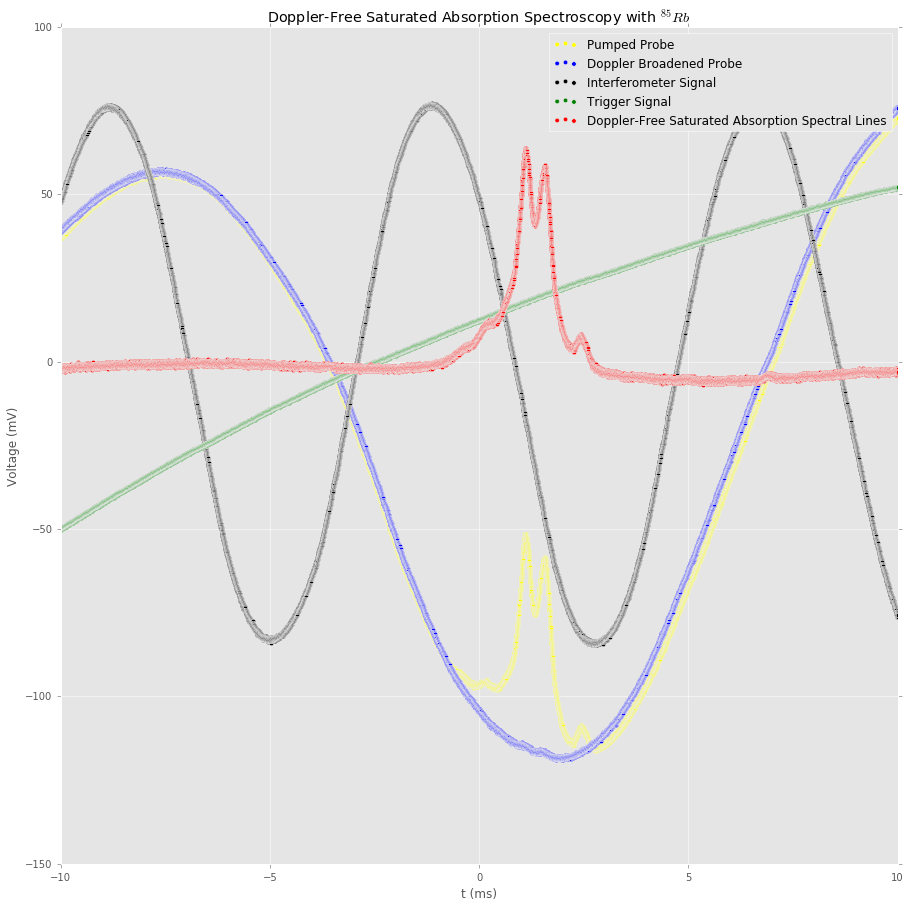

In [12]:
rb85Plot(Rb85_3)

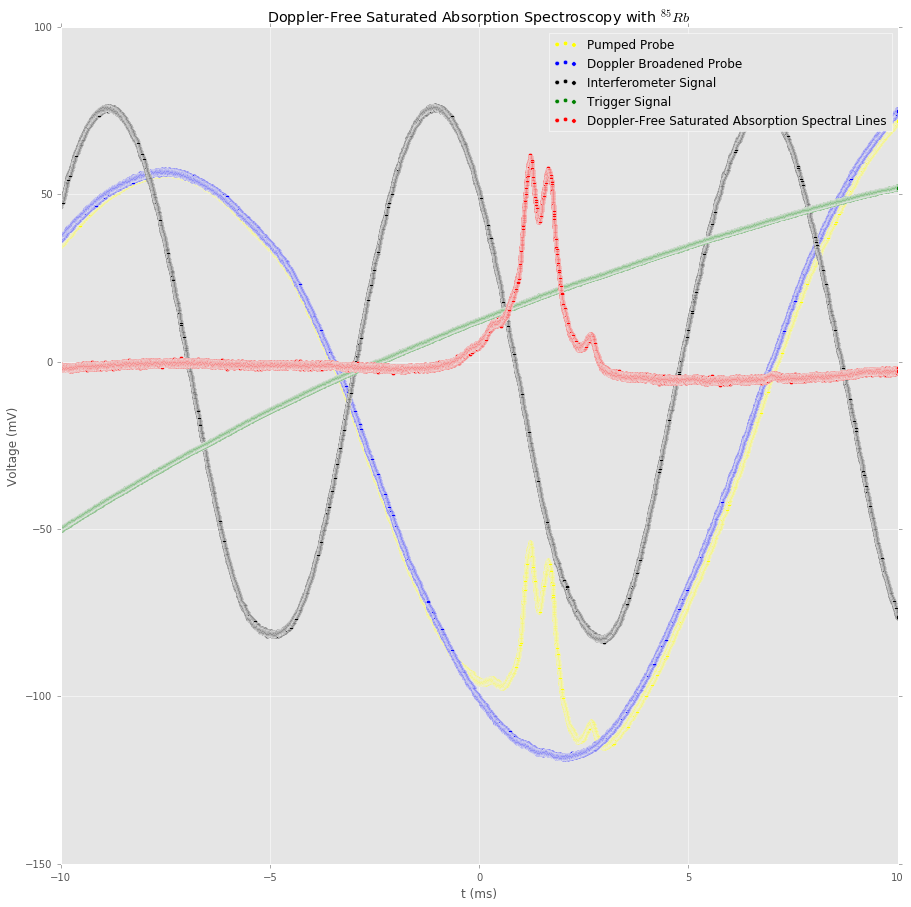

In [13]:
rb85Plot(Rb85_4)

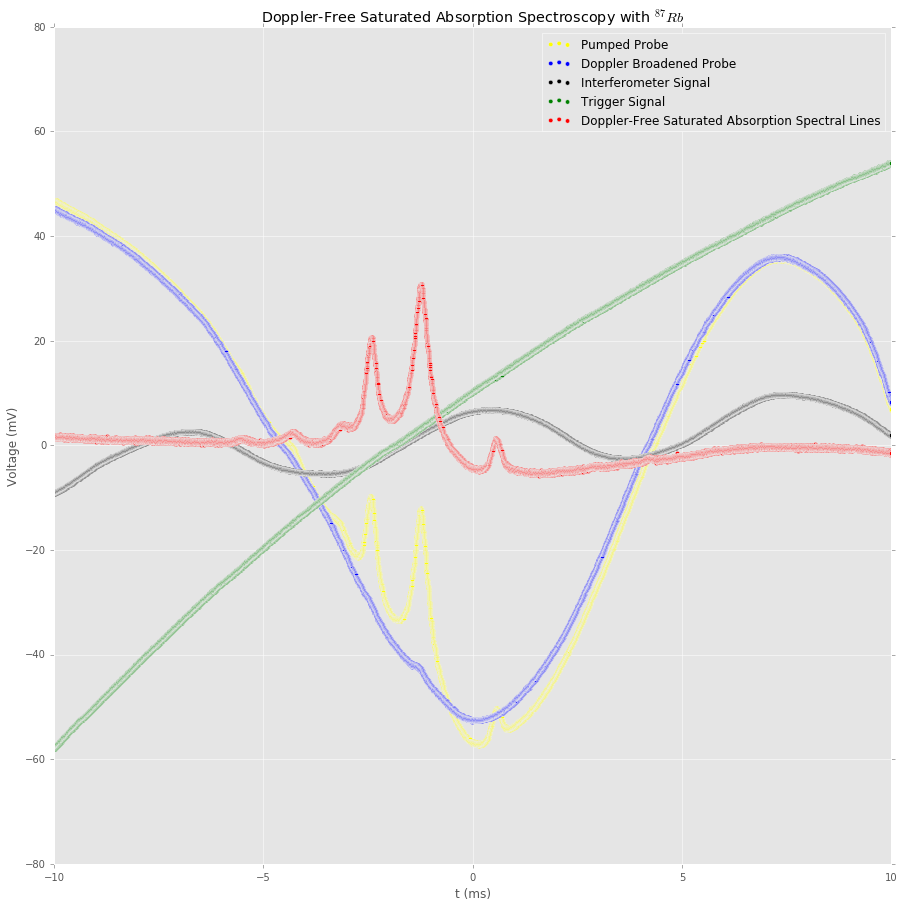

In [14]:
rb87Plot(Rb87_1)

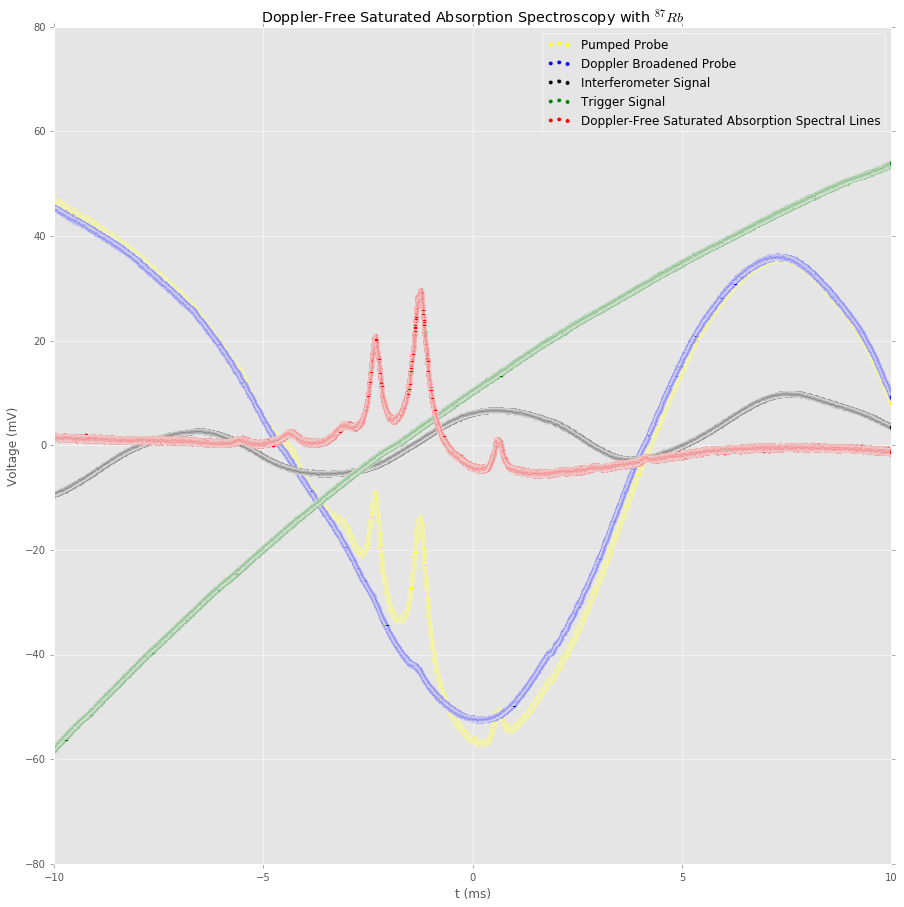

In [15]:
rb87Plot(Rb87_2)

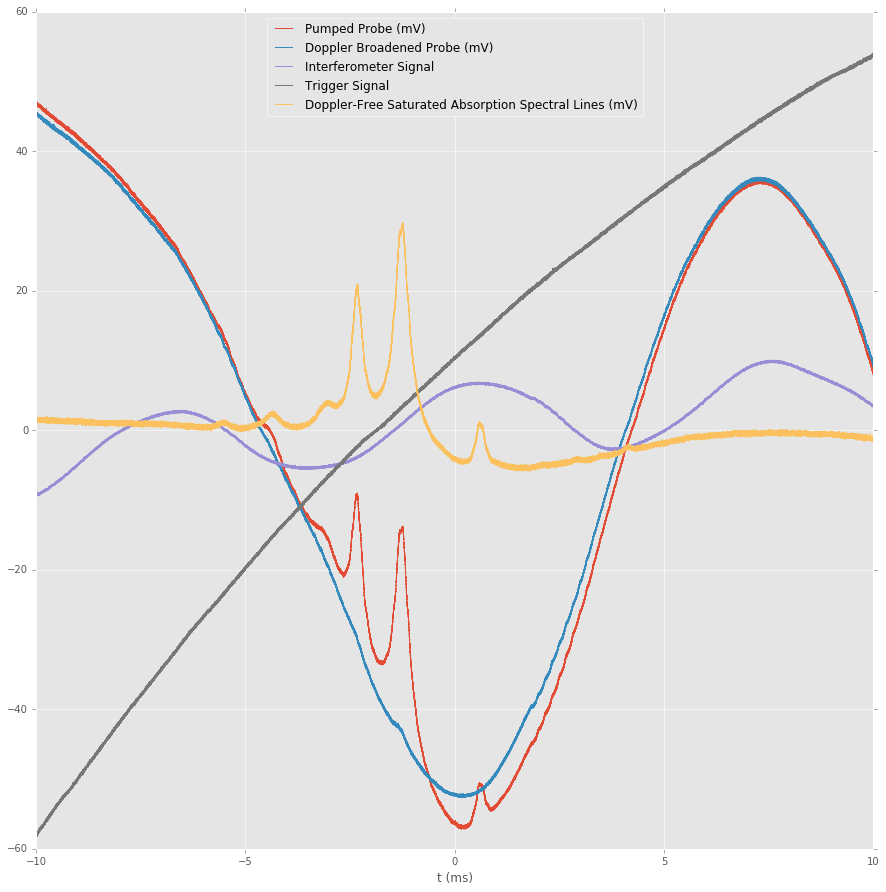

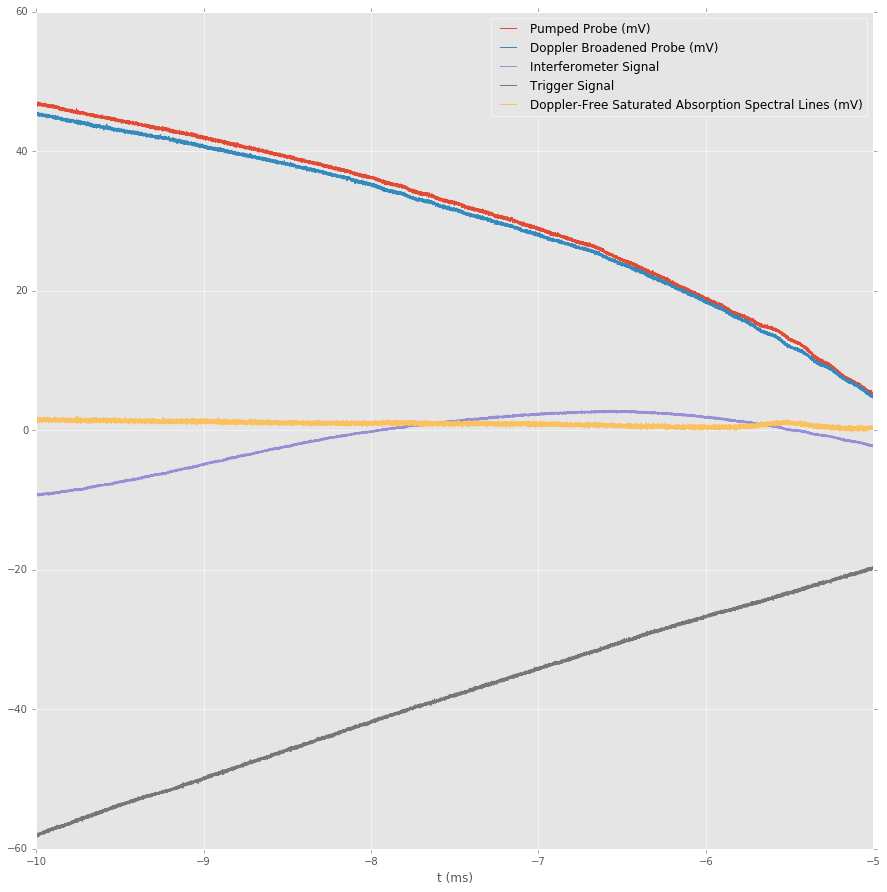

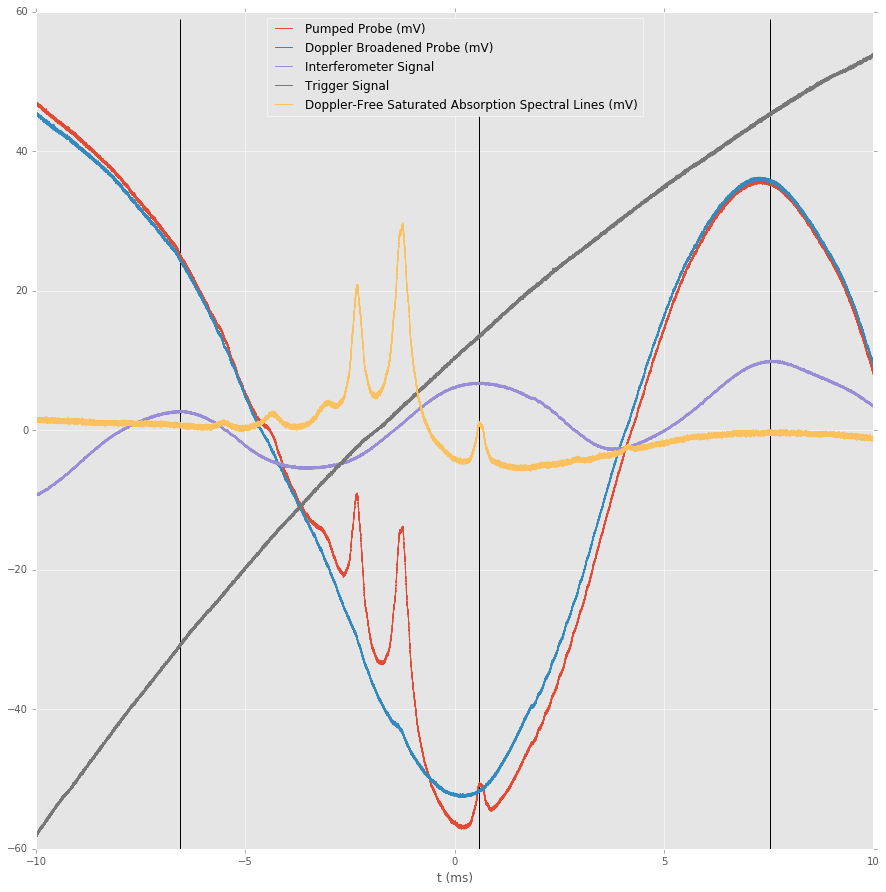

In [25]:
def zoom(dataset, lbound, rbound):
    asarray = np.array(dataset['t (ms)'])
    l_idx = np.searchsorted(asarray,lbound)
    r_idx = np.searchsorted(asarray,rbound)
    return dataset[l_idx:r_idx]

def findPeaks(data, column):
    idx = np.argmax(np.array(data[column]))
    base = data.index[0]
    return idx+base

def showPeaks(data, column, boundLst):
    ax = data.plot(x = 't (ms)', figsize = (15,15))
    for bounds in boundLst:
        zmData = zoom(data, bounds[0], bounds[1])
        peakInd = findPeaks(zmData, column)
        ymin, ymax = ax.get_ylim()
        ax.vlines(x = zmData['t (ms)'].loc[peakInd], ymin=ymin, ymax = ymax-1)
    
Rb87_2.plot(x = 't (ms)', figsize = (15,15))
    
testzm = zoom(Rb87_2,-10,-5)
testzm.plot(x = 't (ms)', figsize = (15,15))

# ax = testzm.plot(x = 't (ms)',figsize = (12,15))
# ymin, ymax = ax.get_ylim()

# test = findPeaks(testzm,'Doppler-Free Saturated Absorption Spectral Lines (mV)')

# print(testzm.index[0])

# print(testzm.loc[test,:])

# ymin, ymax = ax.get_ylim()

# # print(testzm['t (ms)'].loc[test])

# ax.vlines(x = testzm['t (ms)'].loc[test], ymin = ymin, ymax = ymax-1)

# showPeaks(Rb87_2, 'Doppler-Free Saturated Absorption Spectral Lines (mV)', [[-7,-5], [-5,-4], [-3.2,-2.8], [-2.5,-2],[-1.5,-1],[0,2]])

showPeaks(Rb87_2, 'Interferometer Signal', [[-10,-5], [0,5], [5,10]])

Use figure 4 in the lab manual to compare strains of 87 Rb.  from left to right, we have increasing frequency, so we know a (F=2 to F'=1), b (F=2 to Crossover F'=1,2), etc.

**Sources of Error**
* length measurements: Using ruler relies on eyesight and relative position.
* interferometer fringes are much wider than linewidth and splitting lines.  We can expect uncertainty based on inferring a smaller frequency from a longer one.  Because we have 3 peaks, we should be able to have 2 different values for $\Delta \nu$, which we can compare to get a mean with associated error.
*

In order to get frequency measurements from our hyperfine structures, we need to compare widths in the spectroscopy data with the wavelength of the michelson interferometer.  Since we know what the frequency fringe width should be by measuring the difference in arm lengths of the interferometer:
$$
\Delta \nu = \frac{c}{2\Delta L}
$$
We can determine the frequency width of two points of interest by comparing their relative widths.  If $\Delta t$ is the time difference between two peaks of the interferometer signal, and $\tau$ is the time difference between the two points of interest, then the frequency spacing $f$ between these two points is given by
$$
f = \frac{\Delta \nu}{\Delta t} \tau = \frac{c}{2 \Delta L \Delta t} \tau
$$

We now need to implement a means of measuring $\Delta t$ for each set of data.  Since we know that

### ${}^{85}Rb$ Analysis

We look at the the F=3 to 

In [ ]:
rb85Plot(Rb85_3)